In [6]:
from sklearn.datasets import fetch_20newsgroups
#Choosing categories we require 
categories = ['alt.atheism','soc.religion.christian','comp.graphics','sci.med']
#Will take data from the folder train/test
news_train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True)
news_test = fetch_20newsgroups(subset='test',categories=categories,shuffle=True)

In [7]:
import nltk
nltk.download()
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),
                             ('tfidf', TfidfTransformer()),
                             ('mnb',  KNeighborsClassifier(n_neighbors = 18))])

text_mnb_stemmed = text_mnb_stemmed.fit(news_train.data, news_train.target)

predicted_mnb_stemmed = text_mnb_stemmed.predict(news_test.data)

np.mean(predicted_mnb_stemmed == news_test.target)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(news_test.target,predicted_mnb_stemmed ))
print(metrics.classification_report(news_test.target,predicted_mnb_stemmed,target_names=news_test.target_names)),metrics.confusion_matrix(news_test.target,predicted_mnb_stemmed)

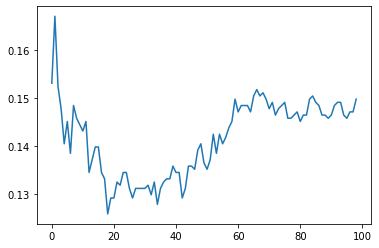

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
error_rates=[]
for i in np.arange(1, 100):
    stemmer = SnowballStemmer("english", ignore_stopwords=True)
    class StemmedCountVectorizer(CountVectorizer):
        def build_analyzer(self):
            analyzer = super(StemmedCountVectorizer, self).build_analyzer()
            return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

    text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),
                             ('tfidf', TfidfTransformer()),
                             ('mnb',  KNeighborsClassifier(n_neighbors = i))])

    text_mnb_stemmed = text_mnb_stemmed.fit(news_train.data, news_train.target)

    predicted_mnb_stemmed = text_mnb_stemmed.predict(news_test.data)

    
    error_rates.append(np.mean(predicted_mnb_stemmed != news_test.target))
plt.plot(error_rates)